In [8]:
import pathlib as pl
import matplotlib.pyplot as plt
#from torchmetrics.functional import structural_similarity_index_measure
from torchmetrics.image import PeakSignalNoiseRatio, StructuralSimilarityIndexMeasure
from torchmetrics.image.lpip import LearnedPerceptualImagePatchSimilarity

import torch
import torchvision.transforms as transforms
import torchvision as tv

In [35]:
render_image_path = "/home/s0001899/Dev/nerf-thesis/renderer.jpg"
gt_img_path = "/home/s0001899/Dev/nerf-thesis/gt.jpg"

render_img = tv.io.read_image(render_image_path) / 255.0
gt_img = tv.io.read_image(gt_img_path) / 255.0

render_img = render_img[None, ...]
gt_img = gt_img[None, ...]

render_img.max()


tensor(0.9765)

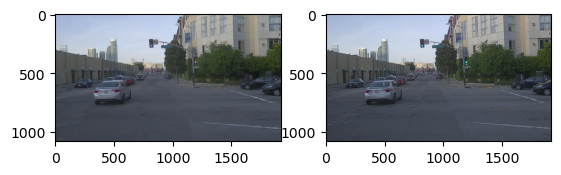

In [37]:
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(render_img[0].permute(1, 2, 0))
ax2.imshow(gt_img[0].permute(1, 2, 0))

In [38]:
psnr = PeakSignalNoiseRatio()
psnr_value = psnr(render_img, gt_img)
psnr_value

tensor(25.5293)

In [39]:
ssim = StructuralSimilarityIndexMeasure(data_range=1.0)
ssim_value = ssim(render_img, gt_img)
# needs BxCxHxW or BxCxDxHxW shape
ssim_value

tensor(0.7354)

In [42]:
lpips = LearnedPerceptualImagePatchSimilarity(net_type='squeeze')
# shape [N, 3, H, W]
lpips_value = lpips(render_img, gt_img)
lpips_value

tensor(0.1058)